<a href="https://colab.research.google.com/github/carlosvales/Redes-ANN/blob/main/PabloCasado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Longitud del texto: 105940 caracteres
El texto está compuesto de estos 92 caracteres:
['\n', ' ', '!', '%', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'X', 'Y', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '¡', '«', '»', '¿', 'Á', 'á', 'é', 'í', 'ñ', 'ó', 'ö', 'ú', 'ü', '\u2009', '\u200c', '—', '―', '‘', '’', '…']


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 383ms/step - loss: 4.2424
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 341ms/step - loss: 3.2403
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step - loss: 3.0092
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step - loss: 2.7818
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 534ms/step - loss: 2.6583
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - loss: 2.5761
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 348ms/step - loss: 2.5054
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 367ms/step - loss: 2.4395
Epoch 9/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 370ms/step - loss: 2.3803
Epoch 10/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 352ms/step - loss: 2.3355
Epoch 11/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 351ms/step - loss: 2.2807
Epoch 12/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 348ms/step - loss: 2.2392
Epoch 13/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 349ms/step - loss: 2.1924
Epoch 14/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 355ms/step - loss: 2.1509
Epoch 15/150
16/16 ━━━━━━━━━━━━━━━━━

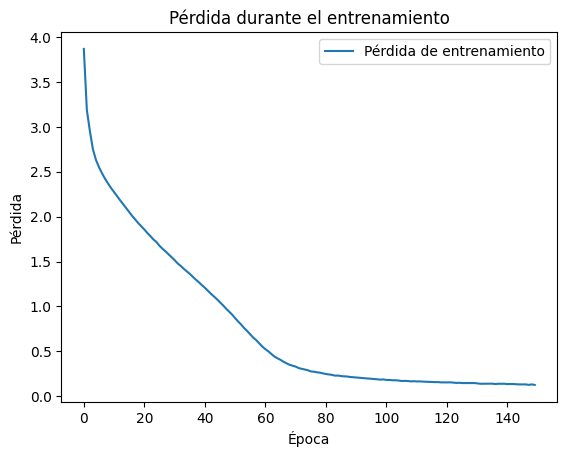

Palabras más comunes (filtradas): {'no': 256, 'usted': 174, 'lo': 154, 'ha': 152, 'por': 151, 'le': 141, 'su': 140, 'se': 136, 'como': 111, '.': 105, 'al': 103, 'más': 83, 'ya': 78, 'señor': 70, 'Sánchez,': 68}


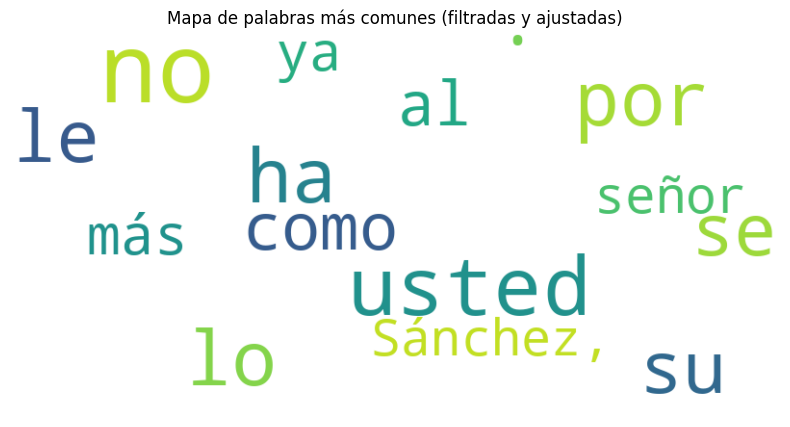

In [1]:
# Importamos las librerías necesarias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from scipy.stats import entropy

# Cargamos y preprocesamos los datos
text = open("intervencionesCasado.txt", 'rb').read().decode(encoding='utf-8')
print('Longitud del texto: {} caracteres'.format(len(text)))

# Extraemos el vocabulario único del texto
vocab = sorted(set(text))
print('El texto está compuesto de estos {} caracteres:'.format(len(vocab)))
print(vocab)

# Mapeamos caracteres a índices y viceversa
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

# Convertimos el texto a índices
text_as_int = np.array([char2idx[c] for c in text])

# Dividimos el texto en secuencias
seq_length = 100
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

# Dividimos cada secuencia en datos de entrada y objetivo
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

# Creamos batches
BATCH_SIZE = 64
BUFFER_SIZE = 10000
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Construcción del modelo
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim),
        LSTM(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'),
        Dense(512, activation="relu"),
        Dropout(0.5),
        Dense(vocab_size)
    ])
    return model

embedding_dim = 512  # Mayor capacidad para capturar relaciones
rnn_units = 2048     # Más unidades en LSTM para un modelo más robusto

model = build_model(vocab_size=len(vocab), embedding_dim=embedding_dim, rnn_units=rnn_units, batch_size=BATCH_SIZE)
model.summary()

# Función de pérdida y compilación del modelo
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss=loss)  # Reducimos el learning rate

# Configuración de callbacks
checkpoint_dir = './training_checkpoints_Casado'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix, save_weights_only=True)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss', patience=10, restore_best_weights=True
)

# Medimos el tiempo de entrenamiento
start_time = time.time()

# Entrenamiento
EPOCHS = 150
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback, early_stopping_callback])

end_time = time.time()
training_time = end_time - start_time
print(f"Tiempo total de entrenamiento: {training_time:.2f} segundos ({training_time / 60:.2f} minutos)")

# Guardamos el modelo entrenado
model.save("model_casado_2024_mejorado.keras")

# Reconstruimos el modelo para generación de texto
model = build_model(len(vocab), embedding_dim, rnn_units, batch_size=1)
model.build(tf.TensorShape([1, None]))
model.load_weights("model_casado_2024_mejorado.keras")

# Función para generar texto
def generate_text(model, start_string, temperature=0.5):
    num_generate = 1000
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []

    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()
        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

# Generación de texto
start_time = time.time()
generated_text = generate_text(model, start_string=u"Pablo habló sobre", temperature=0.5)
end_time = time.time()
generation_time = end_time - start_time

print(f"Texto generado:\n{generated_text[:500]}...")  # Mostrar solo los primeros 500 caracteres
print(f"Tiempo de generación de texto: {generation_time:.2f} segundos")

# Visualización de la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()

# Filtrado de artículos y análisis de palabras más utilizadas
articulos = {'el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unas', 'y', 'de', 'que', 'a', 'en', 'con', 'del', 'para', 'es'}

def analyze_word_frequency_filtered(text, stopwords):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    word_counts = Counter(filtered_words)
    most_common = word_counts.most_common(15)  # Las 15 palabras más comunes
    return dict(most_common)

word_frequencies_filtered = analyze_word_frequency_filtered(text, articulos)
print("Palabras más comunes (filtradas):", word_frequencies_filtered)

# Generar el mapa de palabras ajustado
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis",
    prefer_horizontal=1.0,
    max_font_size=100
).generate_from_frequencies(word_frequencies_filtered)

# Mostrar el mapa de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Mapa de palabras más comunes (filtradas y ajustadas)")
plt.show()


Puntuación BLEU (suavizada): 0.10
Divergencia KL entre distribuciones: inf
Palabras más comunes en texto de referencia: {'y': 3, 'la': 3, 'de': 3, 'más': 3, 'sus': 2, 'recetas': 2, 'que': 2, 'a': 2, 'el': 2, 'los': 2, 'Señor': 1, 'Sánchez,': 1, 'económicas': 1, 'son': 1, 'tan': 1}
Palabras más comunes en texto generado: {'que': 11, 'de': 10, 'la': 5, 'y': 5, 'a': 5, 'las': 5, 'en': 5, 'el': 4, 'más': 3, 'ha': 3, 'sobre': 2, 'los': 2, 'del': 2, 'no': 2, 'han': 2}


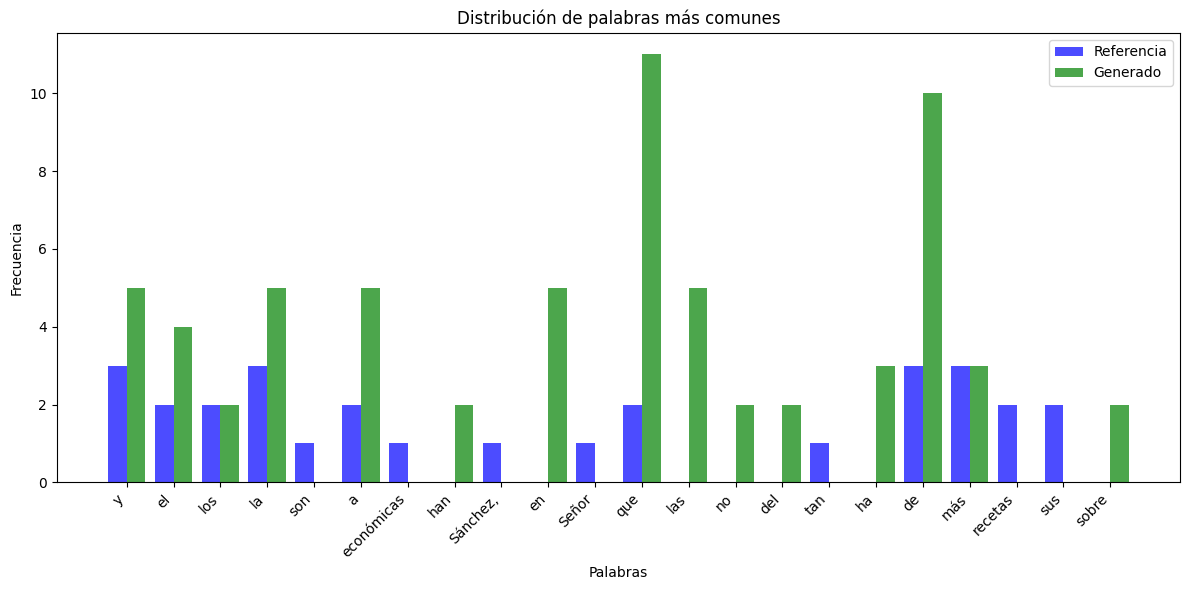

In [2]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from scipy.stats import entropy
from collections import Counter
import numpy as np

# Texto de referencia para el benchmark (usamos parte del texto original)
reference_text = text[:500].split()  # Limitamos a los primeros 500 tokens del texto de referencia
generated_text_tokens = generated_text.split()  # Tokenizamos el texto generado

# 1. **Puntuación BLEU (suavizada)**
smoothing_function = SmoothingFunction().method1
bleu_score = sentence_bleu([reference_text], generated_text_tokens, smoothing_function=smoothing_function)
print(f"Puntuación BLEU (suavizada): {bleu_score:.2f}")

# 2. **Divergencia KL entre distribuciones de palabras**
def calculate_word_distribution(text):
    words = text.split()
    word_counts = Counter(words)
    total_words = sum(word_counts.values())
    word_probs = {word: count / total_words for word, count in word_counts.items()}
    return word_probs

# Distribuciones de palabras
reference_probs = calculate_word_distribution(" ".join(reference_text))
generated_probs = calculate_word_distribution(" ".join(generated_text_tokens))

# Aseguramos que las distribuciones tengan las mismas claves
all_words = set(reference_probs.keys()).union(set(generated_probs.keys()))
reference_probs_array = np.array([reference_probs.get(word, 0) for word in all_words])
generated_probs_array = np.array([generated_probs.get(word, 0) for word in all_words])

# Calculamos la divergencia KL
kl_divergence = entropy(generated_probs_array, reference_probs_array)
print(f"Divergencia KL entre distribuciones: {kl_divergence:.4f}")

# 3. **Análisis de palabras más comunes**
def analyze_word_frequency(text, top_n=15):
    words = text.split()
    word_counts = Counter(words)
    return dict(word_counts.most_common(top_n))

reference_word_freq = analyze_word_frequency(" ".join(reference_text))
generated_word_freq = analyze_word_frequency(" ".join(generated_text_tokens))

print("Palabras más comunes en texto de referencia:", reference_word_freq)
print("Palabras más comunes en texto generado:", generated_word_freq)

# Visualización de distribución de palabras más comunes
import matplotlib.pyplot as plt

def plot_word_distribution(reference_freq, generated_freq):
    all_words = list(set(reference_freq.keys()).union(set(generated_freq.keys())))
    reference_values = [reference_freq.get(word, 0) for word in all_words]
    generated_values = [generated_freq.get(word, 0) for word in all_words]

    x = np.arange(len(all_words))  # Rango para las palabras
    width = 0.4  # Ancho de las barras

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, reference_values, width, label='Referencia', color='blue', alpha=0.7)
    plt.bar(x + width/2, generated_values, width, label='Generado', color='green', alpha=0.7)

    plt.xticks(x, all_words, rotation=45, ha='right')
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de palabras más comunes')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_word_distribution(reference_word_freq, generated_word_freq)
